In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [4]:
from alphadia.extraction.utils import kernel_1d, kernel_2d, kernel_2d_fft

TypeError: Mismatch number of argument types

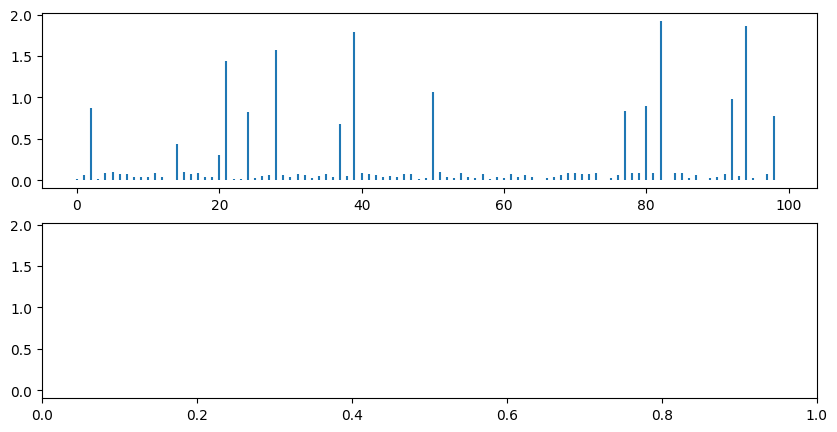

In [5]:
# create test data
# y values will be whole numbers from 0 to 100
x_sparse = np.arange(0,100)
# x values will be uniform noise with single peaks reaching out of the noise
y_sparse = np.maximum((np.random.random(100)-0.8)/0.1,0)+np.random.random(100)*0.1


fig, axs = plt.subplots(nrows=2,sharey=True, figsize=(10,5))
axs[0].stem(x_sparse, y_sparse, markerfmt=' ', basefmt= ' ', label='raw data')

kernel_1 = kernel_1d(2,1)
axs[0].plot(x_sparse, kernel_1(y_sparse), '.g-', label='sigma: 1 , size: 2')

kernel_2 = kernel_1d(4,2)
axs[0].plot(x_sparse, kernel_2(y_sparse), '.r-', label='sigma: 2 , size: 4')

axs[0].legend(loc='upper left')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')


axs[1].stem(x_sparse, y_sparse, markerfmt=' ', basefmt= ' ', label='raw data')

kernel_1 = kernel_1d(4,2,norm='max')
axs[1].plot(x_sparse, kernel_1(y_sparse), '.g-', label='sigma: 2 , size: 4, norm: max')

kernel_2 = kernel_1d(4,2,norm='sum')
axs[1].plot(x_sparse, kernel_2(y_sparse), '.r-', label='sigma: 2 , size: 4, norm: sum')
axs[1].legend(loc='upper left')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()

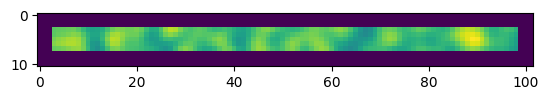

(11, 102)


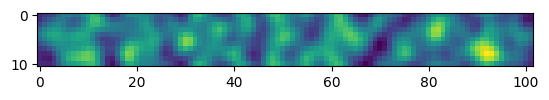

In [4]:
dense = np.random.random((11,102))

smooth = kernel_2d(3,2)(dense)

plt.imshow(smooth)
plt.show()

smooth = kernel_2d_fft(3,2)(dense)
print(smooth.shape)
plt.imshow(smooth)
plt.show()

In [10]:
dense = np.random.random((100,100))

print('Numba without FFT')



#%timeit k(dense)

print('Numpy with FFT')
#ft_k = kernel_2d_fft(3,2)
#%timeit fft_k(dense)

Numba without FFT
Numpy with FFT


In [8]:
k = kernel_2d(3,2)


In [13]:
a = np.array([-1,1,1])
b = np.array([-1,1,1])
c = np.array([1,1,1])

%timeit k(dense, a,b,c)

163 ms ± 532 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
